<a href="https://colab.research.google.com/github/ArjunShaw/Employee_Salary_Prediction/blob/main/Employee_Salary_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Employee Income Category Prediction (Classification)

In [2]:
## 1. Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [4]:
## 2. Loading Dataset
df = pd.read_excel("/content/adult 3.xlsx")
df = df.replace('?', pd.NA)
df = df.dropna()

In [5]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
## 3. Encoding Categorical Features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
## 4. Feature Selection
X = df.drop("income", axis=1)
y = df["income"]

In [8]:
## 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
## 6. Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6842
           1       0.68      0.40      0.50      2203

    accuracy                           0.81      9045
   macro avg       0.75      0.67      0.69      9045
weighted avg       0.79      0.81      0.79      9045

Accuracy: 0.8078496406854616


In [10]:
## 7. Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6842
           1       0.74      0.63      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.86      0.85      9045

Accuracy: 0.8562741846323936


In [11]:
## 8. XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Results:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6842
           1       0.78      0.66      0.72      2203

    accuracy                           0.87      9045
   macro avg       0.84      0.80      0.82      9045
weighted avg       0.87      0.87      0.87      9045

Accuracy: 0.8717523493642897


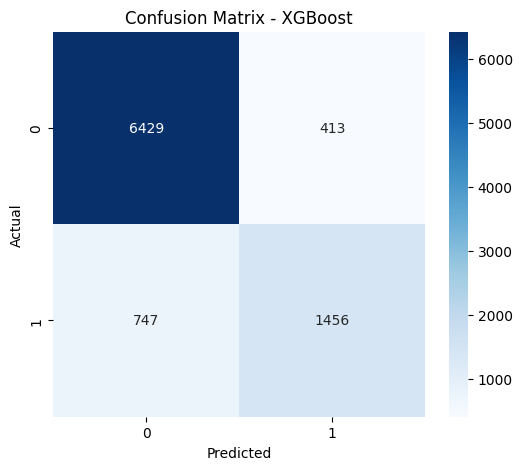

In [12]:
## 9. Confusion Matrix Plot
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset (upload adult 3.xlsx in Colab)
df = pd.read_excel("/content/adult 3.xlsx")
df = df.replace('?', pd.NA).dropna()

# Use only these columns
features = ['age', 'education', 'occupation', 'gender', 'hours-per-week']
target = 'income'
df = df[features + [target]]

# Encode categorical variables
for col in ['education', 'occupation', 'gender']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target
df[target] = df[target].apply(lambda x: 1 if '>50K' in str(x) else 0)

# Train model
X = df.drop(target, axis=1)
y = df[target]
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Save model and columns
joblib.dump(model, 'model.pkl')
joblib.dump(list(pd.get_dummies(df[features]).columns), 'model_columns.pkl')


['model_columns.pkl']

In [17]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# After training and encoding your training data
import joblib

model_columns = list(X_train.columns)  # X_train after pd.get_dummies
joblib.dump(model_columns, "model_columns.pkl")


['model_columns.pkl']

In [19]:
from google.colab import files
files.download("model_columns.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save column names (optional)
with open("model_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)


In [22]:
from google.colab import files
files.download("model_columns.pkl")
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>